# Import Libraries

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.pyplot as plt

# Data Loading

In [2]:
# Tentukan direktori dataset
dataset_dir = 'D:\Pisang'

# Data Augmentation and Preprocessing

In [ ]:
# Data Augmentation untuk melatih model agar lebih generalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel dari 0-255 menjadi 0-1
    rotation_range=20,  # Rotasi gambar secara acak sebesar 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal secara acak
    height_shift_range=0.2,  # Pergeseran vertikal secara acak
    shear_range=0.2,  # Shearing gambar secara acak
    zoom_range=0.2,  # Zoom gambar secara acak
    horizontal_flip=True,  # Membalik gambar secara horizontal
    validation_split=0.21  # Menyisihkan 21% data untuk validasi
)

# Preprocessing untuk data training dan validation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,  # Direktori dataset
    target_size=(224, 224),  # Ubah ukuran gambar menjadi 224x224 piksel (sesuai input MobileNetV2)
    batch_size=64,  # Ukuran batch untuk setiap iterasi
    class_mode='binary',  # Karena kita punya 2 kelas (biner)
    subset='training',  # Data training
    shuffle = True  # Shuffle
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',  # Karena kita punya 2 kelas (biner)
    subset='validation'  # Data validasi
)

Found 1568 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


# Build and Compile the Model

In [4]:
# Load pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,045,441 (11.62 MB)

 Trainable params: 787,457 (3.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model

## Initial Training

In [7]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)


C:\Users\ACER NITRO 5\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6016 - loss: 0.7406

C:\Users\ACER NITRO 5\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6040 - loss: 0.7372 - val_accuracy: 0.7524 - val_loss: 0.5305
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.8108 - loss: 0.4203 - val_accuracy: 0.8245 - val_loss: 0.4139
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.9206 - loss: 0.2431 - val_accuracy: 0.8438 - val_loss: 0.3279
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9582 - loss: 0.1502 - val_accuracy: 0.8654 - val_loss: 0.2852
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9676 - loss: 0.1123 - val_accuracy: 0.8630 - val_loss: 0.3064
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9782 - loss: 0.0790 - val_accuracy: 0.8894 - val_loss: 0.2370
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9841 - loss: 0.0569 - val_accuracy: 0.9062 - val_loss: 0.2308
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9898 - loss: 0.0491 - val_accuracy: 0.8798 - val_loss: 0.2850
Ep

## Fine Tuning Model

In [8]:
# Unfreeze base model
base_model.trainable = True

# Recompile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 7s/step - accuracy: 0.9181 - loss: 0.1929 - val_accuracy: 0.9543 - val_loss: 0.1472
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.9688 - loss: 0.0848 - val_accuracy: 0.9423 - val_loss: 0.1737
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 161s 6s/step - accuracy: 0.9812 - loss: 0.0523 - val_accuracy: 0.9543 - val_loss: 0.1563
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.9904 - loss: 0.0380 - val_accuracy: 0.9567 - val_loss: 0.1500
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.9893 - loss: 0.0371 - val_accuracy: 0.9519 - val_loss: 0.1421
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.9885 - loss: 0.0264 - val_accuracy: 0.9519 - val_loss: 0.1442
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.9958 - loss: 0.0157 - val_accuracy: 0.9423 - val_loss: 0.1876
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.9955 - loss: 0.0123 - val_accuracy: 0.9255 - v

# Visualize Training Results

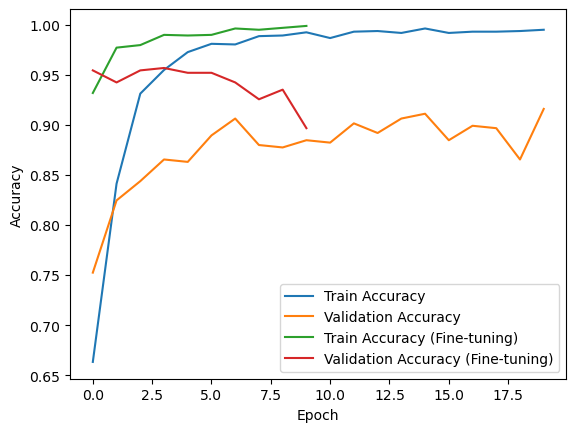

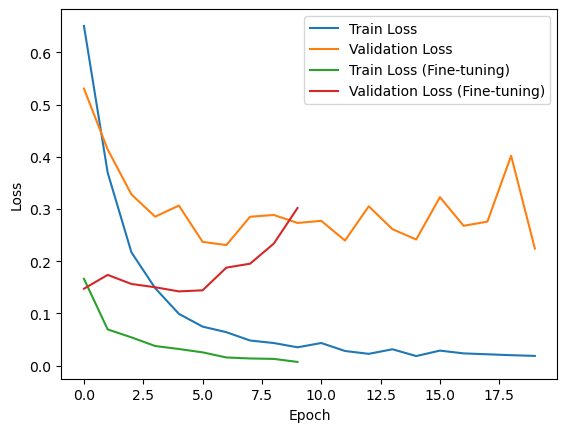

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (Fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (Fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save Model

In [ ]:
# # Simpan Model Terlatih
# model.save('pisang_DNN+MobileNetV21.0.h5')

# Predict Images

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path ke gambar baru yang akan diprediksi
img_path = "D:\pisanghijau4.jpeg"  # Gantilah dengan path gambar baru yang ingin diprediksi

# Memuat gambar dan mengubah ukurannya menjadi 224x224 (sesuai dengan input model)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi nilai piksel

# Melakukan prediksi menggunakan model yang sudah dilatih
prediction = model.predict(img_array)

# Menentukan kelas berdasarkan output model
if prediction[0][0] > 0.5:
    print("Pisang Matang (Kuning)")
else:
    print("Pisang Belum Matang (Hijau)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Pisang Belum Matang (Hijau)
